# Imports

In this section the import libraries required.

In [318]:
import pandas as pd
import numpy as np 
from faker import Faker
from enum import Enum
from typing import List, Any, Tuple, Dict
import string
import uuid
import seaborn as sns
import matplotlib.pyplot as plt
from prettytable import PrettyTable, ALL, FRAME
from html import escape

# 1 Global variables and control definition

In [172]:
person_entity = {
    "userId": str, 
    "username": str, 
    "password": str, 
    "email": str, 
    "name": str, 
    "surname": str, 
    "clinical_gender": ["M", "F"], 
    "current_location": [], 
    "age_range": ["20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80-89", "90-100"],
    "living_country": [], 
    "country_of_origin": []
    }

user_entity = {
    "current_working_status": ["Half-time-worker", "Full-time-worker", "Self-employee", "Unemployed"],
    "marital_status": ["Single", "Married"], 
    "life_style": ["Sedentary", "Lightly active", "Moderately active", "Very active"], 
    "weight": [],
    "ethnicity": ["White", "Black", "Latino", "Asian"], 
    "height": []
}

cultural_factors = {
    "vegan_observant": [True, False],
    "vegetarian_observant": [True, False], 
    "halal_observant": [True, False], 
    "kosher_observant": [True, False],
    "religion_observant": [True, False], 
    "drink_limitation": [True, False], 
    "pescatarian_observant": [True, False],
    "religion": [],
    "food_limitation": []
}

sustainability = {
    "environmental_harm": [],
    "eco_score": [],
    "co2_food_print": [],
    "recyclable_packaging": []
}

actions = {
    "action_type": [],
    "location": [], 
    "action_date": []
}

preferences = {
    "breakfast_time": [],
    "lunch_time": [],
    "dinner_time": []
}

health_conditions = {
    "food_allergies": []
}

user_goals = {
    "user_goals": ["loss_weight", "fit", "food_restrictions"]
}

cultural_factors = {
    "cultural_factors": []
}

diet = {
    "diet_daily_calories": [],
    "calorie_deficit": []
}

    

In [174]:
# set seed for random generator 
np.random.seed(0)

# 2. Generate Personal Data 

In this section the personal user data is generated. 

In [319]:
class Gender(str, Enum):
    male = "M"
    female = "F"

In [320]:
def create_name_surname(gender: str, fake: Faker) -> str:
    if gender == Gender.male:
        names = fake.name_male()
    else:
        names = fake.name_female()
    return names.split(" ")

In [321]:
def generate_country(samples, fake: Faker) -> List:
    return list(map(lambda x: fake.country(), range(samples)))

In [322]:
def generate_email_from_name(name: str, surname: str, domain: str="fake.com"):
    return f"{name.lower()}.{surname.lower()}@{domain.lower()}"

In [323]:
def password_generation(length): 
    chars = string.ascii_letters + string.digits
    list_chars = list(chars)
    password = np.random.choice(list_chars, length)
    return ''.join(password)

In [324]:
def generate_age_range(probabilities = None, list_age_range:List = person_entity.get("age_range")):
    return np.random.choice(list_age_range, size=1, replace=True, p=probabilities)[0]

In [325]:
def generate_localization(samples, fake:Faker): 
    return list(map(lambda x: fake.locale(), range(samples)))

In [327]:
def generate_personal_data(num_users: int=500, person_entity: Dict[str, Any] = None) -> pd.DataFrame:
    # Create Personal data frame 
    df_personal_data = pd.DataFrame(data=[], columns = list(person_entity.keys()))
    # Generate gender and number of users 
    df_personal_data["clinical_gender"] = np.random.choice(np.array(person_entity.get("clinical_gender")), 
                                                       size=num_users, 
                                                       replace=True, 
                                                       p=[0.5, 0.5])
    # Initialize Faker 
    fake = Faker()
    # Generate names and last names 
    names = df_personal_data["clinical_gender"].apply(create_name_surname, fake=fake)
    names_list = list(zip(*names))
    df_personal_data["name"] = names_list[0]
    df_personal_data["surname"] = names_list[1]
    # Generate countries 
    df_personal_data["country_of_origin"] = generate_country(num_users, fake=fake)
    df_personal_data["living_country"] = generate_country(num_users, fake=fake)
    df_personal_data["current_location"] = generate_country(num_users, fake=fake)
    df_personal_data["current_location"] = generate_localization(num_users, fake=fake)
    list_names = list(zip(*df_personal_data[["name", "surname"]].values.tolist()))
    # Generate email 
    df_personal_data["email"] =list(map(lambda x, y: generate_email_from_name(x, y), list_names[0], list_names[1]))
    # Generate password 
    df_personal_data["password"] = list(map(lambda x: password_generation(8), range(num_users)))
    # Generate user id 
    df_personal_data["username"] = df_personal_data["name"].apply(lambda x: x.lower()+str(uuid.uuid4()).split("-")[-2])
    df_personal_data["userId"] = df_personal_data["name"].apply(lambda x: x.lower()+str(uuid.uuid4()).split("-")[-2])
    # Generate age range 
    df_personal_data["age_range"] = list(map(lambda x: generate_age_range(), range(num_users)))
    return df_personal_data

In [328]:
df_personal_data = generate_personal_data(person_entity=person_entity)

In [329]:
df_personal_data.head(7)

userId       username  password                         email  \
0       chad8da2       chadadde  R7JmXrN3           chad.booth@fake.com   
1       luke8e49       lukea2d2  V1mMUhUH             luke.day@fake.com   
2       taraac5b       tarabb19  imjOJt6f         tara.herring@fake.com   
3      megan8942      meganb980  vFBOhnPC          megan.casey@fake.com   
4      emilyb26b      emily8fda  uMWnBBZw        emily.jackson@fake.com   
5  stephanie8abd  stephanieae16  CvjLS1rj  stephanie.patterson@fake.com   
6     carlos8926     carlos825f  AlDlISDx        carlos.chaney@fake.com   

        name    surname clinical_gender current_location age_range  \
0       Chad      Booth               M           lzh_TW     30-39   
1       Luke        Day               M            ky_KG     20-29   
2       Tara    Herring               F            sd_IN     50-59   
3      Megan      Casey               F            es_GT     80-89   
4      Emily    Jackson               F           mni_IN    90-100   
5  Stephanie  Patterson               F            se_NO     80-89   
6     Carlos     Chaney               M            nn_NO     70-79   

                     living_country    country_of_origin  
0                            Jordan           Tajikistan  
1                            Panama          Netherlands  
2                   North Macedonia               France  
3  Saint Vincent and the Grenadines  Trinidad and Tobago  
4                          Guernsey               Jersey  
5                           Vietnam           Cape Verde  
6                          Mongolia                Niger

In [194]:
# save data 
df_personal_data.to_csv("personal_profiles.csv", index=False)

# 3. Generate user status 
Generate for each user the XXX data. 

In [330]:
def choose_one_from_list(list_values: List, 
                         samples : int,  
                         probabilities: List = None, 
                         size: int =1,
                         replace: bool = True):
    return list(map(lambda x: np.random.choice(list_values, size=size, replace=replace, p=probabilities), range(samples)))

In [331]:
class BMI_constants(str, Enum):
    underweight = "underweight"
    healthy = "healthy"
    overweight = "overweight"
    obesity = "obesity"

In [332]:
# set the weight 
def calculate_weight_from_height(height: float, bmi: string):
    bmi_numeric = 0.0
    if bmi == BMI_constants.underweight:
        bmi_numeric = 18.0
    elif bmi == BMI_constants.healthy:
        bmi_numeric = 21.0
    elif bmi == BMI_constants.overweight:
        bmi_numeric = 28.0
    else:
        bmi_numeric = 32.0
    return (height**2)*bmi_numeric

In [336]:
def generate_user_life_style_data(list_user_id: List[str], 
                                  user_entity: Dict[str, Any],
                                  df_columns: List[str] = ["userId", 
                                                           "current_working_status", 
                                                           "marital_status", 
                                                           "life_style", 
                                                           "weight", 
                                                           "ethnicity", 
                                                           "height"]) -> pd.DataFrame:
    df_user_entity = pd.DataFrame(data=[], columns=df_columns)
    df_user_entity["userId"] = list_user_id
    num_users = len(list_user_id)
    df_user_entity["current_working_status"] = choose_one_from_list(user_entity.get("current_working_status"), samples=num_users)
    df_user_entity["marital_status"] = choose_one_from_list(user_entity.get("marital_status"), samples=num_users)
    df_user_entity["life_style"] = choose_one_from_list(user_entity.get("life_style"), samples=num_users)
    df_user_entity["ethnicity"] = choose_one_from_list(user_entity.get("ethnicity"), samples=num_users)
    # Generate BMI values 
    BMI_values = ["underweight", "healthy", "overweight", "obesity"]
    BMI_prob = [0.1, 0.3, 0.3, 0.3]
    bmis = np.random.choice(BMI_values, size=500, replace=True, p=BMI_prob)
    df_user_entity["BMI"] = bmis
    # Generate height
    male_height = np.random.normal(170, 10, 500)
    female_height = np.random.normal(160, 10, 500)
    female_number = df_personal_data[df_personal_data["clinical_gender"] == 'F'].shape[0]
    male_number = num_users - female_number
    df_user_entity.loc[df_personal_data["clinical_gender"] == 'F',"height"] = np.random.choice(female_height, size=female_number)
    df_user_entity.loc[df_personal_data["clinical_gender"] == 'M',"height"] = np.random.choice(male_height, size=male_number)
    df_user_entity["height"] = df_user_entity["height"].astype(int)
    # Generate weight 
    df_user_entity["weight"] = np.round(df_user_entity.apply(lambda row: calculate_weight_from_height(row["height"]/100.0, row["BMI"]), axis=1), 2)
    # 
    df_user_entity["current_working_status"] = df_user_entity["current_working_status"].apply(lambda x: x[0])
    df_user_entity["marital_status"] = df_user_entity["marital_status"].apply(lambda x: x[0])
    df_user_entity["life_style"] = df_user_entity["life_style"].apply(lambda x: x[0])
    df_user_entity["ethnicity"] = df_user_entity["ethnicity"].apply(lambda x: x[0])
    return df_user_entity

In [337]:
df_user_entity = generate_user_life_style_data(df_personal_data["userId"].tolist(),
                                               user_entity=user_entity)

In [338]:
df_user_entity.head(6)

userId current_working_status marital_status         life_style  \
0       chad8da2       Full-time-worker        Married  Moderately active   
1       luke8e49             Unemployed         Single          Sedentary   
2       taraac5b          Self-employee        Married     Lightly active   
3      megan8942       Full-time-worker         Single        Very active   
4      emilyb26b       Full-time-worker        Married          Sedentary   
5  stephanie8abd       Full-time-worker        Married     Lightly active   

   weight ethnicity  height         BMI  
0   54.43     Asian     161     healthy  
1   91.73     White     181  overweight  
2   94.67    Latino     172     obesity  
3   49.80     Asian     154     healthy  
4   91.73     White     181  overweight  
5   75.31     Black     164  overweight

In [209]:
df_user_entity.to_csv("user_entity.csv", index=False)

# 4. Generate health conditions (Allergies)

Generate allergies based on probabilities. 

In [339]:
def generate_health_condition_data(list_user_id: List[str]):
    df_health_conditions = pd.DataFrame(data=[], columns=["userId", "allergy"])
    df_health_conditions["userId"] = list_user_id
    # Allergy array and probabilities 
    allergies = ["cow's milk", "eggs", "peanut", "soy", "fish", "tree nuts", "shellfish", "wheat", "None"]
    allergies_prob = [0.075, 0.075, 0.075, 0.075, 0.075, 0.075, 0.075, 0.075, 0.4]
    user_allergies = np.random.choice(allergies, size=500, replace=True, p = allergies_prob)
    df_health_conditions["allergy"] = user_allergies
    return df_health_conditions

In [340]:
df_health_conditions = generate_health_condition_data(df_personal_data["userId"].tolist())

In [341]:
df_health_conditions.head(6)

userId     allergy
0       chad8da2  cow's milk
1       luke8e49   tree nuts
2       taraac5b        fish
3      megan8942  cow's milk
4      emilyb26b        None
5  stephanie8abd        fish

In [216]:
df_health_conditions.to_csv("health_conditions.csv", index=False)

# 5. Generate user goals

Generate user's nutrition goals. 

In [342]:
class NutritionGoals(str, Enum):
    lose_weight = "lose_weight"
    maintain_fit = "maintain_fit"
    gain_weight = "gain_weight"

In [343]:
def define_user_goal_according_BMI(bmi: str):
    if bmi == BMI_constants.underweight:
        # goal gain muscle 
        return f"{NutritionGoals.gain_weight}"
    elif bmi == BMI_constants.healthy:
        # Maintain fit and increase activity if required 
        return f"{NutritionGoals.maintain_fit}"
    else:
        # nutritional goal loss weight 
        return f"{NutritionGoals.lose_weight}"

In [347]:
def generate_user_goals(list_user_id: List[str]) -> pd.DataFrame: 
    df_user_goals = pd.DataFrame(columns=["userId", "nutrition_goal"], data=[])
    df_user_goals["userId"] = list_user_id
    df_user_goals["nutrition_goal"]=df_user_entity["BMI"].apply(lambda x: define_user_goal_according_BMI(x))
    return df_user_goals

In [348]:
df_user_goals = generate_user_goals(df_personal_data["userId"].tolist())

In [349]:
df_user_goals.head(6)

userId nutrition_goal
0       chad8da2   maintain_fit
1       luke8e49    lose_weight
2       taraac5b    lose_weight
3      megan8942   maintain_fit
4      emilyb26b    lose_weight
5  stephanie8abd    lose_weight

# 6. Generate cultural factors 

Generate cultural preferences and restrictions based on probability distribution.

In [351]:
def generate_probabilities_for_flexi(food_restrictions=["vegan_observant", 
                                                        "vegetarian_observant", 
                                                        "halal_observant", 
                                                        "kosher_observant", 
                                                        "None"]):
    #generate different probabilities for the flexible 
    flexi_probabilities = {
        "flexi_vegie" : dict(zip(food_restrictions,[0.6, 0.2, 0.05, 0.05, 0.1])),
        # "flexi_vegetarian" : dict(zip(food_restrictions,[NN, 0.6, 0.05, 0.05, 0.1])),
        "flexi_vegetarian" : dict(zip(food_restrictions,[0.0, 0.6, 0.05, 0.05, 0.3])),
        "flexi_halal" : dict(zip(food_restrictions,[0.1, 0.1, 0.6, 0.1, 0.1])),
        "flexi_kosher" : dict(zip(food_restrictions,[0.1, 0.1, 0.1, 0.6, 0.1]))
    }
    return flexi_probabilities
    

In [352]:
# assign probabilities 
def assign_probabilities(cultural_factor):
    if cultural_factor == "flexi_observant":
        flexi_proba = generate_probabilities_for_flexi()
        value = np.random.choice(list(flexi_proba.keys()))
        return value
    pass

In [353]:
def generate_cultural_data(list_user_id: List[str]):
    df_cultural_factors = pd.DataFrame(data=[], columns=["userId", "cultural_factor"])
    df_cultural_factors["userId"] = list_user_id
    users_number = len(list_user_id)
    # Food restrictions probabilities 
    food_restrictions = ["vegan_observant", "vegetarian_observant", "halal_observant", "kosher_observant", "flexi_observant", "None"]
    food_restriction_probs = [0.2, 0.3, 0.05, 0.05, 0.1, 0.3]
    # generate cultural restrictions 
    food_restrictions_user = np.random.choice(food_restrictions, size=users_number, replace=True, p=food_restriction_probs)
    df_cultural_factors["cultural_factor"] = food_restrictions_user
    df_cultural_factors["probabilities"] =  None
    # Generate flexi probabilities 
    dict_queries_cultural_factors = {
    "vegan_observant" : "", 
    "vegetarian_observant": "", 
    "halal_observant": "", 
    "kosher_observant": "", 
    "flexi_observant": "None"
}
    flexi_probabilities = generate_probabilities_for_flexi()
    df_cultural_factors["probabilities"] = df_cultural_factors["cultural_factor"].apply(lambda x: assign_probabilities(x))
    return df_cultural_factors

In [354]:
df_cultural_factors = generate_cultural_data(df_personal_data["userId"].tolist())

In [355]:
df_cultural_factors[df_cultural_factors["cultural_factor"] == "flexi_observant"].head(4)

userId  cultural_factor     probabilities
13  brandonad56  flexi_observant      flexi_kosher
26    corey8453  flexi_observant      flexi_kosher
37   victor81e0  flexi_observant  flexi_vegetarian
50   andrea8a40  flexi_observant       flexi_halal

In [233]:
df_cultural_factors.to_csv("cultural_factors.csv", index=False)

# 7. Generate preferences

Generate time preferences for food consumption

In [234]:
df_preferences = pd.DataFrame(data=[], columns=["userId", "breakfast_time", "lunch_time", "dinner_time"])

In [235]:
df_preferences["userId"] = df_personal_data["userId"]

In [236]:
breakfast_time = np.random.normal(7, 1, size=500)
lunch_time = np.random.normal(13, 1, size=500)
dinner_time = np.random.normal(20, 1, size=500)

In [237]:
df_preferences["breakfast_time"] = np.round(breakfast_time, 2)
df_preferences["lunch_time"] = np.round(lunch_time, 2)
df_preferences["dinner_time"] = np.round(dinner_time, 2)

In [238]:
df_preferences.head(6)

userId  breakfast_time  lunch_time  dinner_time
0       tinaad5e            6.95       14.50        20.28
1      kathya83a            7.22       12.70        19.65
2       tinabb6d            9.08       12.25        20.55
3     ashley8e12            7.25       13.32        18.46
4  alexander9008            8.78       11.59        18.74
5     olivia800c            6.99       13.15        20.27

In [239]:
df_preferences.to_csv("preferences.csv", index=False)

# 6. Generate Therapy (Diet)

Based on Harris-Benedict equations:
* For men: 
  $BMR = 13.397W + 4.799H - 5.677A + 88.362$
* For women: 
  $BMR = 9.247W + 3.098H - 4.330A + 447.593$

In [240]:
def calculate_basal_metabolic_rate(weight: float, height: float, age: int, clinical_gender: str):
    BMR = 0
    if Gender.male == clinical_gender:
        BMR = 88.362 + (13.397 * weight) + (4.799 * height) - (5.677 * age)
    else:
        BMR = 447.593 + (9.247 * weight) + (3.098 * height) - (4.330 * age)
    return BMR

In [241]:
class ActivityLevel(str, Enum): 
    sedentary = "Sedentary"
    light_active = "Lightly active"
    moderate_active = "Moderately active"
    very_active = "Very active"

In [242]:
def calculate_daily_calorie_needs(BMR: float, activity_level: str):
    calories_daily = 0
    if activity_level == ActivityLevel.sedentary:
        calories_daily = 1.2 * BMR
    elif activity_level == ActivityLevel.light_active:
        calories_daily = 1.375 * BMR
    elif activity_level == ActivityLevel.moderate_active:
        calories_daily = 1.725 * BMR
    else:
        calories_daily = 1.9 * BMR
    return calories_daily

In [243]:
def define_daily_calorie_needs(nutrition_goal: str, daily_calorie_need: float):
    projected_calories_need = 0 
    if nutrition_goal == NutritionGoals.gain_weight:
        projected_calories_need = daily_calorie_need + 500
    elif nutrition_goal == NutritionGoals.maintain_fit:
        projected_calories_need = daily_calorie_need
    else:
        projected_calories_need = daily_calorie_need - 500
    return projected_calories_need

In [244]:
def generate_diet_plan(weight: float, 
                       height: float, 
                       age_range: str, 
                       clinical_gender: str, 
                       activity_level: str, 
                       nutrition_goal: str): 
    # transform age 
    age_list = age_range.split("-")
    age = np.ceil((int(age_list[-1]) - int(age_list[0]))/2 + int(age_list[0]))
    bmr = calculate_basal_metabolic_rate(weight, height, age, clinical_gender)
    calorie_needs = calculate_daily_calorie_needs(bmr, activity_level)
    projected_calorie_needs = define_daily_calorie_needs(nutrition_goal, calorie_needs)
    return projected_calorie_needs
    

In [245]:
# generate treatment for the users 
df_treatment = pd.DataFrame(data=[], columns=["userId", "projected_daily_calories"])
df_treatment["userId"] = df_personal_data["userId"]


In [246]:
# prepare data
df_user_data = df_user_goals.merge(df_personal_data[["userId", "clinical_gender", "age_range"]],
                                  on="userId")


In [247]:
df_user_data = df_user_data.merge(df_user_entity[["userId","life_style", "weight", "height"]], 
                                  on="userId")

In [248]:
df_treatment["projected_daily_calories"] = np.ceil(df_user_data.apply(lambda row: generate_diet_plan(weight=row["weight"], 
                                                  height=row["height"], 
                                                  age_range=row["age_range"],
                                                  clinical_gender=row["clinical_gender"],
                                                  activity_level=row["life_style"],
                                                  nutrition_goal=row["nutrition_goal"]
                                                  ), axis=1))

In [249]:
df_treatment.head(4)

userId  projected_daily_calories
0    tinaad5e                     920.0
1   kathya83a                    1192.0
2    tinabb6d                    2022.0
3  ashley8e12                    1647.0

In [250]:
df_treatment.to_csv("projected_calories.csv", index=False)

In [251]:
df_treatment["projected_daily_calories"].min(axis=0)

779.0

In [252]:
df_cultural_factors

userId       cultural_factor probabilities
0         tinaad5e  vegetarian_observant          None
1        kathya83a      kosher_observant          None
2         tinabb6d  vegetarian_observant          None
3       ashley8e12       vegan_observant          None
4    alexander9008       vegan_observant          None
..             ...                   ...           ...
495     robert9175                  None          None
496      jessea921                  None          None
497    brendan96e7                  None          None
498      lance999b  vegetarian_observant          None
499        dr.a369                  None          None

[500 rows x 3 columns]

# 7. Data Analysis

In [253]:
df_personal_data.head(3)

userId   username  password                     email   name    surname  \
0   tinaad5e   tina9a70  NQ7CysdS      tina.fisher@fake.com   Tina     Fisher   
1  kathya83a  kathy8963  tT2akdgB  kathy.fernandez@fake.com  Kathy  Fernandez   
2   tinabb6d   tinab152  J5gtIYYM     tina.collins@fake.com   Tina    Collins   

  clinical_gender current_location age_range              living_country  \
0               F            dv_MV     70-79  Slovakia (Slovak Republic)   
1               F            gl_ES     80-89                    Colombia   
2               F            cy_GB     70-79                        Fiji   

          country_of_origin  
0                 Guatemala  
1  Central African Republic  
2                   Georgia

In [254]:
df_user_entity.head(4)

userId current_working_status marital_status      life_style  weight  \
0    tinaad5e             Unemployed        Married       Sedentary   66.36   
1   kathya83a             Unemployed         Single       Sedentary   88.18   
2    tinabb6d       Half-time-worker         Single     Very active   75.31   
3  ashley8e12             Unemployed        Married  Lightly active   47.25   

  ethnicity  height         BMI  
0     Black     144     obesity  
1    Latino     166     obesity  
2     Black     164  overweight  
3    Latino     150     healthy

In [255]:
df_health_conditions.head(3)

userId     allergy
0   tinaad5e  cow's milk
1  kathya83a        eggs
2   tinabb6d        None

In [256]:
users = df_user_entity[df_user_entity["BMI"] == "underweight"]["userId"]

In [257]:
list(users.values)

['olivia800c',
 'nicole9147',
 'bailey8905',
 'angelab70',
 'christopherb37e',
 'brendabc99',
 'bradley8223',
 'jesseb685',
 'richardaf78',
 'leeb858',
 'christopher9de2',
 'kayla9225',
 'daniela7d4',
 'kathryn85b8',
 'david86ae',
 'lisa88d9',
 'russell810f',
 'samanthaac82',
 'christopherb6fa',
 'amberada6',
 'paulb9a9',
 'patricia8bff',
 'danielb5b7',
 'omar95fb',
 'nicolebfde',
 'megan9afc',
 'lindsey9a7c',
 'lindsay8a19',
 'shawnbf8c',
 'shannon8c0a',
 'cynthia83a3',
 'ashley98aa',
 'veronica8bc1',
 'terrya693',
 'natalie8d4a',
 'toddb062',
 'josephad31',
 'denise88af',
 'michelleb3ba',
 'william8762']

In [258]:
vals = df_health_conditions["allergy"].value_counts()

In [259]:
list(zip(list(vals.index), list(vals.values)))

[('None', 199),
 ('peanut', 47),
 ('wheat', 39),
 ('eggs', 38),
 ("cow's milk", 36),
 ('fish', 36),
 ('shellfish', 36),
 ('soy', 35),
 ('tree nuts', 34)]

In [260]:
vals.index

Index(['None', 'peanut', 'wheat', 'eggs', 'cow's milk', 'fish', 'shellfish',
       'soy', 'tree nuts'],
      dtype='object', name='allergy')

In [261]:
vals.values

array([199,  47,  39,  38,  36,  36,  36,  35,  34])

In [262]:
weight_condition = df_user_entity["BMI"].value_counts()

In [263]:
weight_condition.sum()

500

In [264]:
a = "{0}: {1}"

In [265]:
a.format("a", "b")

'a: b'

In [266]:
def format_dict_text(tuple_values: Tuple):
    text_template = "{0}: {1}"
    return text_template.format(tuple_values[0], tuple_values[1])

In [267]:
def format_multiline(list_to_format: List[Any]): 
    format_string = " \t ".join(list_to_format)
    return format_string

In [268]:
def draw_summary_row(row_text, character = "-", up_multiplicity=0, down_multiplicity=0): 
    print(f"{character*up_multiplicity}")
    print(f"| {row_text} |")
    if down_multiplicity > 0:
        print(f"{character*down_multiplicity}")

In [269]:
weight_condition = df_user_entity["BMI"].value_counts()
for condition in weight_condition.index:
    print(condition)

healthy
overweight
obesity
underweight


# 8 Simulation 

In [270]:
from scipy.stats import bernoulli

In [271]:
p = np.array([[0.65, 0.35, 0.0, 0.0], 
              [0.05, 0.80, 0.15, 0.0],
              [0.0, 0.28, 0.67, 0.05],
              [0.0, 0.0, 0.35, 0.65]
              ])

In [272]:
def simulate_final_result(probability_matrix: np.array, samples_size_list: Dict[str, int], state_list: List[str]):
    # generate transitions 
    transitions =  {}
    states = ['underweight', 'healthy', 'overweight', 'obesity']
    for i, state in enumerate(states):
        initial_state = state
        sample_size = samples_size_list[state]
        transitions[initial_state] = {}
        for j in range(probability_matrix.shape[1]):
            if sample_size > 0 and probability_matrix[i][j] > 0.0:
                next_state = state_list[j]
                transition_sample = bernoulli.rvs(probability_matrix[i][j], size=sample_size)
                transitions[initial_state][next_state] = transition_sample.tolist()
                sample_size -= sum(transition_sample)
    return transitions

In [273]:
counts = df_user_entity.groupby(by="BMI").count()["userId"]

In [274]:
transition_matrix = simulate_final_result(p, dict(counts.items()), counts.index)

In [275]:
df_user_entity

userId current_working_status marital_status         life_style  \
0         tinaad5e             Unemployed        Married          Sedentary   
1        kathya83a             Unemployed         Single          Sedentary   
2         tinabb6d       Half-time-worker         Single        Very active   
3       ashley8e12             Unemployed        Married     Lightly active   
4    alexander9008       Full-time-worker         Single  Moderately active   
..             ...                    ...            ...                ...   
495     robert9175          Self-employee         Single     Lightly active   
496      jessea921       Half-time-worker         Single     Lightly active   
497    brendan96e7       Full-time-worker         Single  Moderately active   
498      lance999b       Full-time-worker        Married     Lightly active   
499        dr.a369          Self-employee         Single        Very active   

     weight ethnicity  height         BMI  
0     66.36     Black     144     obesity  
1     88.18    Latino     166     obesity  
2     75.31     Black     164  overweight  
3     47.25    Latino     150     healthy  
4     91.73     Asian     181  overweight  
..      ...       ...     ...         ...  
495   69.02     Asian     157  overweight  
496   93.57     Asian     171     obesity  
497   72.96    Latino     151     obesity  
498   61.41     Black     171     healthy  
499   53.09     White     159     healthy  

[500 rows x 8 columns]

In [276]:
df_user_data.head(3)

userId nutrition_goal clinical_gender age_range   life_style  weight  \
0   tinaad5e    lose_weight               F     70-79    Sedentary   66.36   
1  kathya83a    lose_weight               F     80-89    Sedentary   88.18   
2   tinabb6d    lose_weight               F     70-79  Very active   75.31   

   height  
0     144  
1     166  
2     164

In [277]:
df_user_join = df_user_data.merge(df_treatment, on="userId")
df_user_join = df_user_join.merge(df_cultural_factors,  on="userId")
df_user_join = df_user_join.merge(df_health_conditions,  on="userId")
df_user_join = df_user_join.merge(df_user_entity[["userId", "BMI"]],  on="userId")

In [278]:
df_user_join.to_csv("simulation_ready_user_data.csv", index=False, sep="|")

In [279]:
# load recipes data 
df_recipes = pd.read_csv("processed_recipes_dataset.csv", sep="|")

In [280]:
df_recipes_filter = df_recipes[df_recipes["calories"]>=0.0]

In [281]:
df_user_join

userId nutrition_goal clinical_gender age_range  \
0         tinaad5e    lose_weight               F     70-79   
1        kathya83a    lose_weight               F     80-89   
2         tinabb6d    lose_weight               F     70-79   
3       ashley8e12   maintain_fit               F     30-39   
4    alexander9008    lose_weight               M     80-89   
..             ...            ...             ...       ...   
495     robert9175    lose_weight               M     40-49   
496      jessea921    lose_weight               M     60-69   
497    brendan96e7    lose_weight               M     80-89   
498      lance999b   maintain_fit               M     50-59   
499        dr.a369   maintain_fit               F     20-29   

            life_style  weight  height  projected_daily_calories  \
0            Sedentary   66.36     144                     920.0   
1            Sedentary   88.18     166                    1192.0   
2          Very active   75.31     164                    2022.0   
3       Lightly active   47.25     150                    1647.0   
4    Moderately active   91.73     181                    2439.0   
..                 ...     ...     ...                       ...   
495     Lightly active   69.02     157                    1578.0   
496     Lightly active   93.57     171                    1967.0   
497  Moderately active   72.96     151                    1757.0   
498     Lightly active   61.41     171                    1952.0   
499        Very active   53.09     159                    2514.0   

          cultural_factor probabilities     allergy         BMI  
0    vegetarian_observant          None  cow's milk     obesity  
1        kosher_observant          None        eggs     obesity  
2    vegetarian_observant          None        None  overweight  
3         vegan_observant          None         soy     healthy  
4         vegan_observant          None        eggs  overweight  
..                    ...           ...         ...         ...  
495                  None          None        None  overweight  
496                  None          None        None     obesity  
497                  None          None        eggs     obesity  
498  vegetarian_observant          None  cow's milk     healthy  
499                  None          None        None     healthy  

[500 rows x 12 columns]

In [282]:
df_recipes_filter

title  \
0                                            Fruit Salad   
1                                         Vegan Pancakes   
2                                 Overnight Chia Pudding   
3                                          Avocado Toast   
4                                         Vegan Omelette   
...                                                  ...   
10195   Mexican stuffed bell peppers with ground beef...   
10196   Caprese quinoa salad with grilled chicken - 3...   
10197   Baked coconut shrimp with mango salsa and jas...   
10198   One-pot creamy chicken and mushroom pasta - 4...   
10199   Stuffed bell peppers with couscous, chickpeas...   

                                                raw_text  meal_type  \
0      1. Fruit Salad: 70 calories per portion, 4 por...  breakfast   
1      2. Vegan Pancakes: 150 calories per portion, 4...  breakfast   
2      3. Overnight Chia Pudding: 200 calories per po...  breakfast   
3      4. Avocado Toast: 250 calories per portion, 2 ...  breakfast   
4      5. Vegan Omelette: 300 calories per portion, 1...  breakfast   
...                                                  ...        ...   
10195  96. Mexican stuffed bell peppers with ground b...     dinner   
10196  97. Caprese quinoa salad with grilled chicken ...     dinner   
10197  98. Baked coconut shrimp with mango salsa and ...     dinner   
10198  99. One-pot creamy chicken and mushroom pasta ...     dinner   
10199  100. Stuffed bell peppers with couscous, chick...     dinner   

      cultural_restriction  calories                allergies  
0                    vegan      70.0     contains fruits only  
1                    vegan     150.0                      NaN  
2                    vegan     200.0  contains nuts (almonds)  
3                    vegan     250.0                      NaN  
4                    vegan     300.0  contains chickpea flour  
...                    ...       ...                      ...  
10195                  NaN     450.0         contains lactose  
10196                  NaN     350.0         contains lactose  
10197                  NaN     420.0       contains shellfish  
10198                  NaN     480.0          contains gluten  
10199                  NaN     350.0         contains lactose  

[6300 rows x 6 columns]

In [283]:
df_recipes_filter.sample(10)

title  \
2291                            Vegan Soba Noodle Salad   
1809                          Vegetable Curry with Rice   
6791                            Moroccan Chicken Tagine   
2293                                       Lentil Tacos   
4379   Greek Style Orzo with Roasted Vegetables - 41...   
1368     Vegan Tom Yum Soup\nTotal calories per portion   
5140   Breakfast tacos - 450 calories per portion, 2...   
6759                      Lentil and Vegetable Stir Fry   
9584   Three-bean chili with cornbread – 350 calorie...   
2799                       Veggie Breakfast Pizza Rolls   

                                               raw_text  meal_type  \
2291  92. Vegan Soba Noodle Salad: 350kcals per port...     dinner   
1809  10. Vegetable Curry with Rice: 400 calories/po...      lunch   
6791  92. Moroccan Chicken Tagine: 500kcals per port...      lunch   
2293  94. Lentil Tacos: 250kcals per portion, serves...     dinner   
4379  80. Greek Style Orzo with Roasted Vegetables -...      lunch   
1368  69. Vegan Tom Yum Soup\nTotal calories per por...      lunch   
5140  41. Breakfast tacos - 450 calories per portion...  breakfast   
6759  60. Lentil and Vegetable Stir Fry: 350kcals pe...      lunch   
9584  85. Three-bean chili with cornbread – 350 calo...     dinner   
2799  100. Veggie Breakfast Pizza Rolls: 400 calorie...  breakfast   

     cultural_restriction  calories                 allergies  
2291                vegan     350.0           contains gluten  
1809                vegan     400.0                       NaN  
6791                halal     500.0  contains dairy (Morocco)  
2293                vegan     250.0                       NaN  
4379           vegetarian     410.0           contains gluten  
1368                vegan     200.0                       NaN  
5140                halal     450.0           contains gluten  
6759                halal     350.0                       NaN  
9584               kosher     350.0                       NaN  
2799           vegetarian     400.0  contains wheat and dairy

In [284]:
df_recipes_filter["allergies"].fillna("")

0           contains fruits only
1                               
2        contains nuts (almonds)
3                               
4        contains chickpea flour
                  ...           
10195           contains lactose
10196           contains lactose
10197         contains shellfish
10198            contains gluten
10199           contains lactose
Name: allergies, Length: 6300, dtype: object

In [285]:
df_user_join["allergy"].value_counts()

allergy
None          199
peanut         47
wheat          39
eggs           38
cow's milk     36
fish           36
shellfish      36
soy            35
tree nuts      34
Name: count, dtype: int64

In [286]:
def allergy_searcher(recipes_db_allergy_col, allergy:str):
    res = []
    allergy_low = allergy.lower()
    for item in recipes_db_allergy_col.items():
        text = str(item[1]).lower()
        if allergy_low in text:
            print(text)
            print(allergy_low)
            res.append(False)
        else:
            res.append(True)
    return res

In [287]:
df_user_join

userId nutrition_goal clinical_gender age_range  \
0         tinaad5e    lose_weight               F     70-79   
1        kathya83a    lose_weight               F     80-89   
2         tinabb6d    lose_weight               F     70-79   
3       ashley8e12   maintain_fit               F     30-39   
4    alexander9008    lose_weight               M     80-89   
..             ...            ...             ...       ...   
495     robert9175    lose_weight               M     40-49   
496      jessea921    lose_weight               M     60-69   
497    brendan96e7    lose_weight               M     80-89   
498      lance999b   maintain_fit               M     50-59   
499        dr.a369   maintain_fit               F     20-29   

            life_style  weight  height  projected_daily_calories  \
0            Sedentary   66.36     144                     920.0   
1            Sedentary   88.18     166                    1192.0   
2          Very active   75.31     164                    2022.0   
3       Lightly active   47.25     150                    1647.0   
4    Moderately active   91.73     181                    2439.0   
..                 ...     ...     ...                       ...   
495     Lightly active   69.02     157                    1578.0   
496     Lightly active   93.57     171                    1967.0   
497  Moderately active   72.96     151                    1757.0   
498     Lightly active   61.41     171                    1952.0   
499        Very active   53.09     159                    2514.0   

          cultural_factor probabilities     allergy         BMI  
0    vegetarian_observant          None  cow's milk     obesity  
1        kosher_observant          None        eggs     obesity  
2    vegetarian_observant          None        None  overweight  
3         vegan_observant          None         soy     healthy  
4         vegan_observant          None        eggs  overweight  
..                    ...           ...         ...         ...  
495                  None          None        None  overweight  
496                  None          None        None     obesity  
497                  None          None        eggs     obesity  
498  vegetarian_observant          None  cow's milk     healthy  
499                  None          None        None     healthy  

[500 rows x 12 columns]

In [288]:
# randomize the meals and the percentages 
df_user_join["userId"]

0           tinaad5e
1          kathya83a
2           tinabb6d
3         ashley8e12
4      alexander9008
           ...      
495       robert9175
496        jessea921
497      brendan96e7
498        lance999b
499          dr.a369
Name: userId, Length: 500, dtype: object

In [289]:
def generate_meals_plan_per_user(users: List[str], probability_dict: Dict[str, float]):
    total_users = len(users)
    meal_presence = {}
    for key, proba in probability_dict.items():
        meal_presence[key] = bernoulli.rvs(proba, size=total_users)
    return meal_presence

In [290]:
meals_proba = {
    "breakfast": 0.80,
    "morning snacks": 0.45,
    "afternoon snacks": 0.40,
    "lunch": 0.95,
    "dinner": 0.85
}

In [291]:
meals_plan = generate_meals_plan_per_user(df_user_join["userId"].tolist(), meals_proba)

In [315]:
def generate_recommendations(df_user, transition_matrix, df_recipes_db, meals_plan, days_to_simulated=365):
    meals_dict = {"breakfast":0.3,
                  "morning snacks": 0.05,
                  "afternoon snacks": 0.4,
                  "lunch": 0.05,
                  "dinner": 0.2}
    dict_flexi_probas = generate_probabilities_for_flexi()
    simulation_results = {}
    df_recipes_db["allergies"] = df_recipes_db["allergies"].fillna("")
    for i in range(len(df_user)):
        # Generate recommendations for each user
        try:
            user_db = df_user.iloc[i, :]
            daily_calories = user_db.projected_daily_calories
            daily_calories_list = [daily_calories for i in range(days_to_simulated)]
            flexi_probas = None
            current_state = user_db.BMI
            print(f"Simulating for user: {user_db.userId}")
            df_recommendations = pd.DataFrame(columns=[f"{k}_calories" for k in meals_dict.keys()]+list(meals_dict.keys()),
                                            index=np.arange(1, days_to_simulated+1))
            # filter cultural factor and allergies 
            # allergy restrictions filter
            allergies_factor = user_db.allergy
            if allergies_factor != "None":
                filtered_recipe_db = df_recipes_db[df_recipes_db["allergies"].str.contains(allergies_factor)]
            else: 
                filtered_recipe_db = df_recipes_db
            if filtered_recipe_db.shape[0] == 0:
                # Remove filter if it is empty 
                filtered_recipe_db = df_recipes_db
            # cultural restrictions filter
            cultural_factor = user_db.cultural_factor
            if cultural_factor != "None" and cultural_factor != "flexi_observant":
                cultural_factor = cultural_factor.split("_")[0]
                filtered_recipe_db = filtered_recipe_db[filtered_recipe_db["cultural_restriction"] == cultural_factor]
            elif cultural_factor == "flexi_observant":
                # get flexi_proba
                flexi_class = df_user.loc[i, "probabilities"]
                flexi_probas = dict_flexi_probas[flexi_class]
                print(f"Flexi probas: {flexi_probas}")
                print(f"Flexi condition: {flexi_class}")
            else: 
                filtered_recipe_db = df_recipes_db
            if filtered_recipe_db.shape[0] == 0:
                # remove filter if it is empty 
                filtered_recipe_db = df_recipes_db
            for meal_tp in ["lunch", "dinner", "breakfast", "morning snacks", "afternoon snacks"]:
                # generate recommendations 
                print(f"meal {meal_tp}")
                # generate meals according to meals plan
                meal = meals_plan[meal_tp]
                if meal[i] != 0:
                    meal_db = filtered_recipe_db[filtered_recipe_db["meal_type"] == meal_tp]
                    #print(meal_db.shape)
                    if meal_db.shape[0] == 0:
                        meal_db = filtered_recipe_db
                    meal_chosen = []
                    for j in range(days_to_simulated):
                        # flexi 
                        if flexi_probas is not None:
                            #TODO: put proper name to variables.  
                            print("Flexi proba...")
                            list_proba = [k for k in flexi_probas.keys()]
                            list_weights = [flexi_probas[k] for k in list_proba]
                            flexi_meal = np.random.choice(list_proba, p=list_weights)
                            if flexi_meal != "None":
                                flexi_meal = flexi_meal.split("_")[0]
                                meal_db = meal_db[meal_db["cultural_restriction"] == flexi_meal]
                            print(f"Flexi meal chose: {flexi_meal}")
                            if meal_db.shape[0] == 0:
                                meal_db = filtered_recipe_db[filtered_recipe_db["meal_type"] == meal_tp]
                        max_calories_meal = daily_calories_list[j] * meals_dict[meal_tp]
                        possible_recipes = meal_db[meal_db["calories"] <= max_calories_meal+np.random.normal(0, 50)]
                        if possible_recipes.shape[0] == 0:
                            possible_recipes = meal_db
                        choose_recipes = possible_recipes.sample(1, replace=True)
                        #print(f"Day {j+1}")
                        meal_chosen.append(choose_recipes[["title", "calories"]])
                        # update counter 
                        #print(f"select recipe: {choose_recipes['calories'].values[0]}")
                        daily_calories_list[j] = daily_calories_list[j] - choose_recipes['calories'].values[0]
                    total_simulations = pd.concat(meal_chosen)
                    total_simulations.reset_index(inplace=True)
                    df_recommendations[f"{meal_tp}_calories"] = total_simulations['calories']
                    df_recommendations[meal_tp] = total_simulations['title']
                else:
                    df_recommendations[meal_tp] = ["N/A" for i in range(days_to_simulated)]
                    df_recommendations[f"{meal_tp}_calories"] = [0 for i in range(days_to_simulated)]
            simulation_results[f"{user_db.userId}"] = df_recommendations
        except Exception as e:
            print(f"Error processing user: {df_user.iloc[i, 0]}, {e}")
            continue
    return simulation_results

In [316]:
simulation_results = generate_recommendations(df_user_join, 
                                          transition_matrix=transition_matrix, df_recipes_db = df_recipes_filter,
                                          meals_plan=meals_plan)

/tmp/ipykernel_2023382/1938438358.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recipes_db["allergies"] = df_recipes_db["allergies"].fillna("")


Simulating for user: tinaad5e
meal lunch
meal dinner
meal breakfast
meal morning snacks
meal afternoon snacks
Simulating for user: kathya83a
meal lunch
meal dinner
meal breakfast
meal morning snacks
meal afternoon snacks
Simulating for user: tinabb6d
meal lunch
meal dinner
meal breakfast
meal morning snacks
meal afternoon snacks
Simulating for user: ashley8e12
meal lunch
meal dinner
meal breakfast
meal morning snacks
meal afternoon snacks
Simulating for user: alexander9008
meal lunch
meal dinner
meal breakfast
meal morning snacks
meal afternoon snacks
Simulating for user: olivia800c
meal lunch
meal dinner
meal breakfast
meal morning snacks
meal afternoon snacks
Simulating for user: scott8583
Flexi probas: {'vegan_observant': 0.1, 'vegetarian_observant': 0.1, 'halal_observant': 0.6, 'kosher_observant': 0.1, 'None': 0.1}
Flexi condition: flexi_halal
meal lunch
Flexi proba...
Flexi meal chose: halal
Flexi proba...
Flexi meal chose: halal
Flexi proba...
Flexi meal chose: halal
Flexi proba.

In [126]:
simulation_results['daniel9360']

breakfast_calories  morning snacks_calories  afternoon snacks_calories  \
1                 250.0                    100.0                       70.0   
2                 300.0                    100.0                      130.0   
3                 200.0                     60.0                      150.0   
4                 250.0                     90.0                      170.0   
5                 350.0                    100.0                       90.0   
..                  ...                      ...                        ...   
361               300.0                     80.0                      200.0   
362               300.0                     80.0                      290.0   
363               300.0                    120.0                      120.0   
364               600.0                     80.0                      140.0   
365               250.0                    120.0                      150.0   

     lunch_calories  dinner_calories  \
1             150.0            350.0   
2              20.0            250.0   
3             150.0            300.0   
4             150.0            150.0   
5             150.0            300.0   
..              ...              ...   
361           150.0            300.0   
362           165.0            250.0   
363           150.0            400.0   
364           120.0            350.0   
365           150.0            330.0   

                                             breakfast  \
1     Vegan overnight oats with almond milk and ber...   
2     Blueberry almond smoothie (300 calories per p...   
3                                      Banana Pancakes   
4     Almond joy smoothie (250 calories per portion...   
5     Moroccan baghrir (semolina pancakes) with hon...   
..                                                 ...   
361   Vegan Chocolate Banana Smoothie Bowl - 300 ca...   
362                                       Cheesy Grits   
363   Chia pudding with mixed berries - 300 calorie...   
364                           Vegan Breakfast Biscotti   
365                   Greek Yogurt with Honey and Nuts   

                                        morning snacks  \
1                     Cucumber Rolls with Cream Cheese   
2     Cinnamon Apple Chips - 100kcals per portion, ...   
3                                 Fruit Salad - Approx   
4                                        Stuffed Dates   
5                        Vegetable Crudité with Hummus   
..                                                 ...   
361                                        Fruit Salad   
362                                         Kale Chips   
363                                         Kale Chips   
364                        Fresh Squeezed Orange Juice   
365                                        Granola Bar   

                                      afternoon snacks  \
1     Cinnamon Apple Chips - 70 kcals per portion, ...   
2     Baked Falafel with Tahini Sauce - 130 kcals p...   
3                      Baked Buffalo Cauliflower Bites   
4                                Vegetable Sushi Rolls   
5                         Greek Feta and Olive Skewers   
..                                                 ...   
361                        Mini Quinoa Stuffed Peppers   
362   Antipasto Skewers - 290 kcals per portion, 3 ...   
363                                No-Bake Energy Bars   
364   Vegan Lemon Bars - 140 kcals per portion, 4 p...   
365                                     Zucchini chips   

                                                 lunch  \
1       Lentil Soup - 150kcals per portion, 6 portions   
2                                    Moroccan Mint Tea   
3                                    Tomato Basil Soup   
4                                Butternut squash soup   
5                         Greek Tzatziki Dip with Pita   
..                                                 ...   
361                              Butternut squash soup   
362   Caprese Salad 

In [124]:
def generate_simulations(df_user, transition_matrix, df_recipes_db, days_to_simulated = 365):
    meals_dict = {"breakfast":0.3,
                  "morning snacks": 0.05,
                  "afternoon snacks": 0.4,
                  "lunch": 0.05,
                  "dinner": 0.2}
    simulation_results = {}
    df_recipes_db["allergies"] = df_recipes_db["allergies"].fillna("")
    for i in range(len(df_user)):
        try:
            user_db = df_user.iloc[i, :]
            current_state = user_db.BMI
            # possible_transition = list(transition_matrix[current_state].keys())
            # if len(possible_transition) > 2:
            #     next_state = np.random.choice(possible_transition, size=1)
            # else: 
            #     next_state = np.random.choice(possible_transition, size=1)
            #     print(f"User next state: {next_state}")
            print(f"Simulating for user: {user_db.userId}")
            df_recommendations = pd.DataFrame(columns=[f"{k}_calories" for k in meals_dict.keys()]+list(meals_dict.keys()),
                                            index=np.arange(1, days_to_simulated+1))
            # filter cultural factor and allergies 
            # allergy restrictions filter
            allergies_factor = user_db.allergy
            if allergies_factor != "None":
                filtered_recipe_db = df_recipes_db[df_recipes_db["allergies"].str.contains(allergies_factor)]
            else: 
                filtered_recipe_db = df_recipes_db
            if filtered_recipe_db.shape[0] == 0:
                filtered_recipe_db = df_recipes_db
            # cultural restrictions filter
            cultural_factor = user_db.cultural_factor
            if cultural_factor != "None":
                cultural_factor = cultural_factor.split("_")[0]
                filtered_recipe_db = filtered_recipe_db[filtered_recipe_db["cultural_restriction"] == cultural_factor]
            else: 
                filtered_recipe_db = df_recipes_db
            if filtered_recipe_db.shape[0] == 0:
                filtered_recipe_db = df_recipes_db
            for meal_tp in list(meals_dict.keys()):
                # generate recommendations 
                #print(f"meal {meal_tp}")
                daily_calories = user_db.projected_daily_calories
                meal_db = filtered_recipe_db[filtered_recipe_db["meal_type"] == meal_tp]
                #print(meal_db.shape)
                if meal_db.shape[0] == 0:
                    meal_db = filtered_recipe_db
                max_calories_meal = daily_calories * meals_dict[meal_tp]
                possible_recipes = meal_db[meal_db["calories"] <= max_calories_meal+np.random.normal(0, 50)]
                if possible_recipes.shape[0] == 0:
                    possible_recipes = meal_db
                choose_recipes = possible_recipes.sample(days_to_simulated, replace=True)
                df_recommendations[meal_tp] = choose_recipes["title"].values
                df_recommendations[f"{meal_tp}_calories"] = choose_recipes["calories"].values
            simulation_results[f"{user_db.userId}"] = df_recommendations
        except Exception as e:
            print(f"Error processing user: {df_user.iloc[i, 0]}, {e}")
            continue
    return simulation_results

In [ ]:
#TODO:Implement a flexible class which are dedicate to one class but with a certain probability 

In [125]:
simulation_results = generate_simulations(df_user_join, 
                                          transition_matrix=transition_matrix, df_recipes_db = df_recipes_filter)

/tmp/ipykernel_2023382/712055419.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recipes_db["allergies"] = df_recipes_db["allergies"].fillna("")


Simulating for user: helen8f67
Simulating for user: staceyb817
Simulating for user: miss8a35
Simulating for user: mary97cb
Simulating for user: daniel9360
Simulating for user: barbara9dbf
Simulating for user: charles9915
Simulating for user: destinya7e0
Simulating for user: melaniea5f8
Simulating for user: john83f8
Simulating for user: makayla8d14
Simulating for user: stacy8e55
Simulating for user: samantha8a06
Simulating for user: beckyb845
Simulating for user: cory867d
Simulating for user: andrew8409
Simulating for user: gabriel816d
Simulating for user: feliciabd22
Simulating for user: maryb1ae
Simulating for user: michelle8a9a
Simulating for user: julie80b1
Simulating for user: courtneyae6c
Simulating for user: williamb74a
Simulating for user: mollyb459
Simulating for user: jareda772
Simulating for user: tiffany9e1a
Simulating for user: tyler9da7
Simulating for user: grace825f
Simulating for user: alyssaba8c
Simulating for user: ronaldb1cb
Simulating for user: anthony898a
Simulating

<Axes: xlabel='weight', ylabel='Density'>

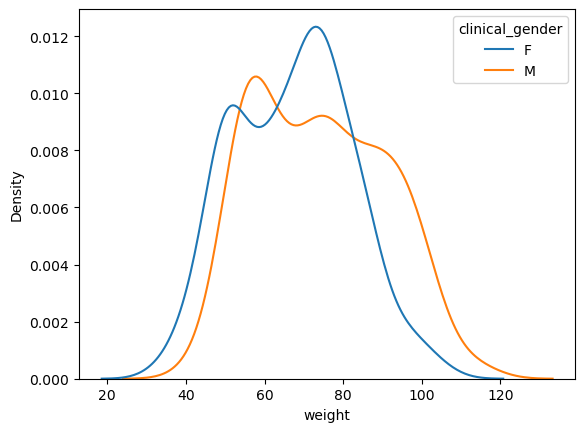

In [ ]:
sns.kdeplot(data=df_user_data, x="weight", hue="clinical_gender")

In [ ]:
sns.countplot(data=df_user_join, x="user")

In [ ]:
len(df_recipes_filter["title"].unique())

5149

In [127]:
df_user_join

userId nutrition_goal clinical_gender age_range         life_style  \
0      helen8f67    lose_weight               F     70-79          Sedentary   
1     staceyb817    lose_weight               F     80-89          Sedentary   
2       miss8a35    lose_weight               F     70-79        Very active   
3       mary97cb   maintain_fit               F     30-39     Lightly active   
4     daniel9360    lose_weight               M     80-89  Moderately active   
..           ...            ...             ...       ...                ...   
495      dr.a99f    lose_weight               M     40-49     Lightly active   
496  stephenaa68    lose_weight               M     60-69     Lightly active   
497     johna419    lose_weight               M     80-89  Moderately active   
498   darrena6f1   maintain_fit               M     50-59     Lightly active   
499   nicolea38a   maintain_fit               F     20-29        Very active   

     weight  height  projected_daily_calories       cultural_factor  \
0     66.36     144                     920.0  vegetarian_observant   
1     88.18     166                    1192.0      kosher_observant   
2     75.31     164                    2022.0  vegetarian_observant   
3     47.25     150                    1647.0       vegan_observant   
4     91.73     181                    2439.0       vegan_observant   
..      ...     ...                       ...                   ...   
495   69.02     157                    1578.0                  None   
496   93.57     171                    1967.0                  None   
497   72.96     151                    1757.0                  None   
498   61.41     171                    1952.0  vegetarian_observant   
499   53.09     159                    2514.0                  None   

        allergy         BMI  
0    cow's milk     obesity  
1          eggs     obesity  
2          None  overweight  
3           soy     healthy  
4          eggs  overweight  
..          ...         ...  
495        None  overweight  
496        None     obesity  
497        eggs     obesity  
498  cow's milk     healthy  
499        None     healthy  

[500 rows x 11 columns]

In [128]:
df_user_join.to_csv("df_user_join.csv")

In [ ]:
bernoulli.rvs(0.6, size=1)[0]

1

In [129]:
class HTML_Table:
    def __init__(self, cols:int = 4, rows: List[str] = None):
        self.cols = cols
        if rows is not None:
            self.rows = rows
        else:
            self.rows = []
    
    def add_rows(self, new_rows=List[str]):
        self.rows.extend(new_rows)
      
    def add_row(self, row:str):
        self.rows.append(row)
    
    def _repr_html_(self):
        return """<table border=\"1\">
        {row}
    </table>""".format(row="\n".join(self.rows))
    
    def render(self):
        return self._repr_html_()

In [ ]:
table = HTML_Table()

In [ ]:
table.add_row("<tr><th style=\"text-align: left;\"><FONT COLOR=\"#ff0000\"> Tracking simulation: {} days</FONT></th></tr>".format(365))
table.add_row("<tr><th style=\"text-align: left;\">Total users: {}</th></tr>".format(500))
table.add_row("<tr><td colspan=\"2\">Clinical gender male: 50%</td><td colspan=\"2\">Clinical gender female: 50%</td></tr>")
table.add_row("<tr><td>Underweight users: 45 (10.0 %)</td><td>Fit users: 153 (30.0 %)</td><td>Overweight users: 152 (30.0 %)</td><td>Obese users: 153 (30.0 %)</td></tr>")
table.add_row("<tr><th>Allergies:</th><th>Allergies:</th><th>Allergies:</th><th>Allergies:</th></tr>")
table.add_row("<tr><th>Cultural factors:</th><th>Cultural factors:</th><th>Cultural factors:</th><th>Cultural factors:</th></tr>")
table.add_row("<tr>Nutrition summary</tr>")

In [ ]:
print(table.render())

<table border="1">
        <tr><th style="text-align: left;"><FONT COLOR="#ff0000"> Tracking simulation: 365 days</FONT></th></tr>
<tr><th style="text-align: left;">Total users: 500</th></tr>
<tr><td colspan="2">Clinical gender male: 50%</td><td colspan="2">Clinical gender female: 50%</td></tr>
<tr><td>Underweight users: 45 (10.0 %)</td><td>Fit users: 153 (30.0 %)</td><td>Overweight users: 152 (30.0 %)</td><td>Obese users: 153 (30.0 %)</td></tr>
<tr><th>Allergies:</th><th>Allergies:</th><th>Allergies:</th><th>Allergies:</th></tr>
<tr><th>Cultural factors:</th><th>Cultural factors:</th><th>Cultural factors:</th><th>Cultural factors:</th></tr>
<tr>Nutrition summary</tr>
    </table>


In [ ]:
table

In [ ]:
from IPython import display
from IPython.display import HTML

In [ ]:
HTML(table.render())

In [ ]:
a = df_user_join["clinical_gender"].value_counts()

In [ ]:
for x, val in a.items():
    print(x, val)

M 254
F 246


In [ ]:
a = df_user_join.groupby(by=["BMI", "clinical_gender"]).count()

In [ ]:
a.xs("healthy", level=0)["userId"]

clinical_gender
F    69
M    84
Name: userId, dtype: int64

In [130]:
def create_a_summary_table(df_total_user, dict_recommendations, simulation_days = 365, max_cols = 4, round_digits = 0):
    meals_dict = {"breakfast":0.3,
                  "morning snacks": 0.05,
                  "afternoon snacks": 0.4,
                  "lunch": 0.05,
                  "dinner": 0.2}
    # Create table 
    table = HTML_Table(cols=max_cols)
    total_users = df_total_user.shape[0]
    # Add rows to the table 
    table.add_row(
        "<tr><th style=\"text-align: center;\" colspan=\"{span_cols}\"><strong>Tracking simulation: {days} days</strong></th></tr>".format(
            span_cols=max_cols,
            days=simulation_days))
    table.add_row("<tr><td style=\"text-align: left;\" colspan=\"{span_cols}\">\
        Total users: {total_users}</td></tr>".format(
        span_cols=max_cols,
        total_users=total_users))
    # Clinical gender 
    clinical_gender_count = df_total_user["clinical_gender"].value_counts()
    # Show clinical gender 
    temp_row = []
    for idx, item in clinical_gender_count.items():
        temp_row.append(f"<td style=\"text-align: left;\" colspan=\"{max_cols/2}\">Clinical gender\
            {'male' if idx == 'M' else 'female'}: {item}\
            users ({np.round((item/total_users)*100, round_digits)} %)</td>")
    table.add_row("<tr>{row_data}</tr>".format(row_data="".join(temp_row)))
    # Health condition 
    weight_condition = df_total_user["BMI"].value_counts()
    weight_condition_gender = df_total_user.groupby(by=["BMI", "clinical_gender"]).count()
    temp_row = []
    for idx, item in weight_condition.items():
        weight_gender_count = weight_condition_gender.xs(idx, level=0)["userId"]
        temp_row.append(f"<td style=\"text-align: left;\">Health condition {idx}:\
            {item} users ({np.round((item/total_users)*100, round_digits)} %) \
                <font color=\"lightblue\">(Male: {np.round((weight_gender_count.M/item)*100, round_digits)}%</font>,\
                <font color=\"pink\">Female: {np.round((weight_gender_count.F/item)*100, round_digits)}%</font>)</td>")
    table.add_row("<tr>{row_data}</tr>".format(row_data="".join(temp_row)))
    # Allergies 
    table.add_row("<tr><th style=\"text-align: center;\" colspan=\"{span_cols}\"><strong>Allergies</strong></th></tr>".format(span_cols=max_cols))
    df_groups = df_total_user.groupby(by=["BMI", "allergy"])
    temp_row = []
    temp_cols = []
    df_counts  = df_groups.count()
    allergy_index = list(df_counts.xs("healthy", level=0).index)
    for allergy in allergy_index:
        temp_cols = []
        for hl, per_condition_patient in weight_condition.items():
            users_count = df_counts.loc[(hl, allergy), 'userId']
            temp_cols.append(f"<td style=\"text-align: left;\">{allergy}: {users_count}\
                <font color=\"red\">({np.round((users_count/total_users)*100, 2)} % total)</font> \
                <font color=\"green\">({np.round((users_count/per_condition_patient)*100, 2)} % relative)</font> </td>")
        table.add_row("<tr>{cells}</tr>".format(cells="".join(temp_cols))) 
    # Cultural factors
    table.add_row("<tr><th style=\"text-align: center;\" colspan=\"{span_cols}\"><strong>Cultural factors</strong></th></tr>".format(span_cols=max_cols))
    df_groups = df_total_user.groupby(by=["BMI", "cultural_factor"])
    temp_row = []
    temp_cols = []
    df_counts  = df_groups.count()
    allergy_index = list(df_counts.xs("healthy", level=0).index)
    for allergy in allergy_index:
        temp_cols = []
        for hl, per_condition_patient in weight_condition.items():
            users_count = df_counts.loc[(hl, allergy), 'userId']
            temp_cols.append(f"<td style=\"text-align: left;\">{allergy}: {users_count}\
                <font color=\"red\">({np.round((users_count/total_users)*100, 2)} % total)</font> \
                <font color=\"green\">({np.round((users_count/per_condition_patient)*100, 2)} % relative)</font> </td>")
        table.add_row("<tr>{cells}</tr>".format(cells="".join(temp_cols))) 
    # Food summary 
    table.add_row("<tr><th style=\"text-align: center;\" colspan=\"{span_cols}\"><strong>Food Summary</strong></th></tr>".format(span_cols=max_cols))
    temp_dict = {}
    for key, _ in weight_condition.items():
        df_users_list = []
        users = df_total_user[df_total_user["BMI"] == key]["userId"].tolist()
        for u in users:
            df_users_list.append(dict_recommendations[u])
        temp_dict[key] = pd.concat(df_users_list, axis=0)
    # visualize 
    total_recipes = []
    total_recipes_unique = []
    total_recipes_per_meal = {}
    temp_row = []
    temp_cols = []
    df_counts  = df_groups.count()
    meals_index = list(meals_dict.keys())
    for meal in meals_index:
        temp_cols = []
        for hl,_ in weight_condition.items():
            mean = temp_dict[hl][f"{meal}_calories"].mean()
            std = temp_dict[hl][f"{meal}_calories"].std()
            recipes = len(temp_dict[hl][meal])
            unique_recipes = len(temp_dict[hl][meal].unique())
            temp_cols.append(f"<td style=\"text-align: left;\">{meal}: {recipes} recipes ({unique_recipes} unique recipes),\
                calories: {np.round(mean, 1)} Kcals &plusmn; {np.round(std, 1)} Kcals </td>")
        table.add_row("<tr>{cells}</tr>".format(cells="".join(temp_cols))) 
    # Total recipes 
    table.add_row("<tr><th style=\"text-align: center;\" colspan=\"{span_cols}\"><strong>Totals</strong></th></tr>".format(span_cols=max_cols))
    for key, _ in weight_condition.items():
        total_recipes.append(len(temp_dict[key])) 
        list_vals = [len(temp_dict[key][x].unique()) for x in meals_dict.keys()]
        print(list_vals)
        flat_list = []
        total_recipes_unique.append(sum(list_vals))
    table.add_row("<tr>{values}</tr>".format(
            values = "".join([f"<td style=\"text-align: left;\">Total recommend meals: {total_recipes[i]} ({total_recipes_unique[i]} unique)</td>" for i in range(len(total_recipes))])))
    # total recipes per meal 
    total_df_list = [temp_dict[k] for k in temp_dict.keys()]
    total_df = pd.concat(total_df_list, axis=0)
    for meal in meals_dict.keys():
        total_recommendations = len(total_df[meal])
        total_meal = len(total_df[meal].unique())
        table.add_row(f"<tr><td style=\"text-align: left;\", colspan={max_cols}>Total {meal}:\
            {total_recommendations} ({total_meal} uniques)</td></tr>")
    return table

In [131]:
table = create_a_summary_table(df_user_join, simulation_results)

[821, 1285, 991, 1409, 1533]
[872, 1572, 1009, 1557, 1525]
[835, 1304, 1009, 1430, 1584]
[809, 786, 979, 932, 1478]


In [132]:
table

In [133]:
# Save the recommendations 
for key in simulation_results.keys():
    data = simulation_results[key]
    data.to_csv(f"userid_{key}_recommendations.csv")

In [ ]:
# create html file for console 
text = f"""
<!DOCTYPE html>
<html>
<head>
<title></title>
</head>
<body>
{table.render()}
</body>
</html>
"""

In [ ]:
with open("summary.html", "w") as fp:
    fp.write(text)

In [ ]:
HTML(text)

#TODO: Download data and html

In [317]:
simulation_results

{'tinaad5e':      breakfast_calories  morning snacks_calories  afternoon snacks_calories  \
 1                 250.0                        0                          0   
 2                 350.0                        0                          0   
 3                 400.0                        0                          0   
 4                 350.0                        0                          0   
 5                 200.0                        0                          0   
 ..                  ...                      ...                        ...   
 361               250.0                        0                          0   
 362               300.0                        0                          0   
 363               300.0                        0                          0   
 364               200.0                        0                          0   
 365                 NaN                        0                          0   
 
      lunch_calories  dinn